In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from scipy.spatial.distance import cdist
import functools

%matplotlib inline

In [2]:
### Kernel function generators
def linear_kernel(X1, X2):
    """
    Computes the linear kernel between two sets of vectors.
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
    Returns:
        matrix of size n1xn2, with x1_i^T x2_j in position i,j
    """
    return np.dot(X1,np.transpose(X2))
 
def RBF_kernel(X1,X2,sigma):
    """
    Computes the RBF kernel between two sets of vectors   
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
        sigma - the bandwidth (i.e. standard deviation) for the RBF/Gaussian kernel
    Returns:
        matrix of size n1xn2, with exp(-||x1_i-x2_j||^2/(2 sigma^2)) in position i,j
    """
    #TODO
    return np.exp(-cdist(X1, X2, 'sqeuclidean') / (2*sigma **2))


def polynomial_kernel(X1, X2, offset, degree):
    """
    Computes the inhomogeneous polynomial kernel between two sets of vectors
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
        offset, degree - two parameters for the kernel
    Returns:
        matrix of size n1xn2, with (offset + <x1_i,x2_j>)^degree in position i,j
    """
    #TODO
    return (offset + linear_kernel(X1, X2))**degree

#### Q22. Use the linear kernel function defined in the code to compute the kernel matrix on the set of points x0 ∈ DX = {−4, −1, 0, 2}. Include both the code and the output.

In [3]:
x = [-4,-1,0,2]
kernel_matrix = np.zeros((len(x), len(x)))
for i in range(len(x)):
    for j in range(len(x)):
        kernel_matrix[i,j] = linear_kernel(x[i], x[j])        
print(kernel_matrix)

[[16.  4.  0. -8.]
 [ 4.  1.  0. -2.]
 [ 0.  0.  0.  0.]
 [-8. -2.  0.  4.]]


#### Q23. Suppose we have the data set D_X,y = {(−4, 2),(−1, 0),(0, 3),(2, 5)} (in each set of parentheses, the first number is the value of xi and the second number the corresponding value of the target yi). Then by the representer theorem, the final prediction function will be in the span of the functions x 7→ k(x0, x) for x0 ∈ D_X = {−4, −1, 0, 2}. This set of functions will look quite different depending on the kernel function we use. The set of functions x 7→ klinear(x0, x) for x0 ∈ X and for x ∈ [−6, 6] has been provided for the linear kernel.
(a) Plot the set of functions x → kpoly(1,3)(x0, x) for x0 ∈ DX and for x ∈ [−6, 6].

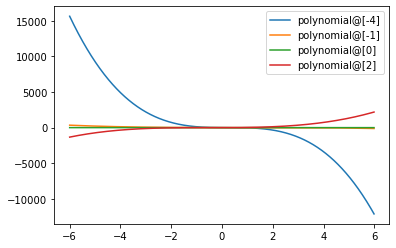

In [116]:
plot_step = .01
xpts = np.arange(-6.0, 6, plot_step).reshape(-1,1)
prototypes = np.array([-4,-1,0,2]).reshape(-1,1)
offset = 1
degree = 3

# RBF kernel
y = polynomial_kernel(prototypes, xpts, offset, degree)
for i in range(len(prototypes)):
    label = "polynomial@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.show() 

(b) Plot the set of functions x → kRBF(1)(x0, x) for x0 ∈ X and for x ∈ [−6, 6]

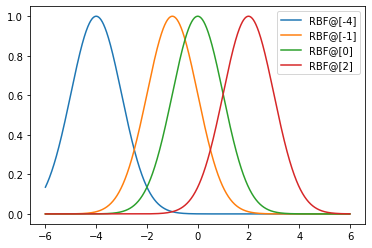

In [5]:
plot_step = .01
sigma = 1
xpts = np.arange(-6.0, 6, plot_step).reshape(-1,1)
prototypes = np.array([-4,-1,0,2]).reshape(-1,1)

# RBF kernel
y = RBF_kernel(prototypes, xpts, sigma)
for i in range(len(prototypes)):
    label = "RBF@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.show() 

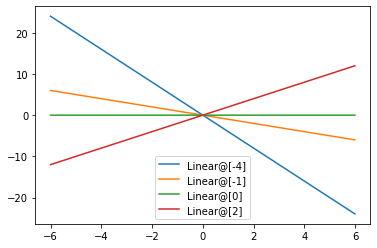

In [6]:
# PLot kernel machine functions

plot_step = .01
xpts = np.arange(-6.0, 6, plot_step).reshape(-1,1)
prototypes = np.array([-4,-1,0,2]).reshape(-1,1)

# Linear kernel
y = linear_kernel(prototypes, xpts) 
for i in range(len(prototypes)):
    label = "Linear@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.show()  

#### Q24. Complete the predict function of the class Kernel Machine. Construct a Kernel Machine object with the RBF kernel (sigma=1), with prototype points at −1, 0, 1 and corresponding weights αi 1, −1, 1. Plot the resulting function.

In [7]:
class Kernel_Machine(object):
    def __init__(self, kernel, training_points, weights):
        """
        Args:
            kernel(X1,X2) - a function return the cross-kernel matrix between rows of X1 and rows of X2 for kernel k
            training_points - an nxd matrix with rows x_1,..., x_n
            weights - a vector of length n with entries alpha_1,...,alpha_n
        """

        self.kernel = kernel
        self.training_points = training_points
        self.weights = weights
        
    def predict(self, X):
        """
        Evaluates the kernel machine on the points given by the rows of X
        Args:
            X - an nxd matrix with inputs x_1,...,x_n in the rows
        Returns:
            Vector of kernel machine evaluations on the n points in X.  Specifically, jth entry of return vector is
                Sum_{i=1}^R alpha_i k(x_j, mu_i)
        """
        # TODO
        pred = np.dot(self.weights.T, self.kernel(self.training_points, X))
        return pred.T

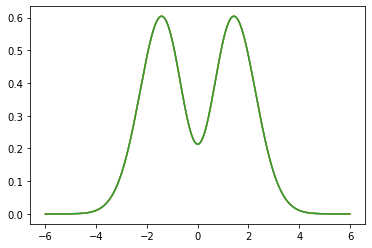

In [8]:
plot_step = .01
sigma = 1
xpts = np.arange(-6.0, 6, plot_step).reshape(-1,1)
prototypes = np.array([-1, 0, 1]).reshape(-1,1)
weights = np.array([1,-1,1]).reshape(-1,1)

for i in range(len(prototypes)):
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = Kernel_Machine(k, prototypes, weights)
    plt.plot(xpts, f.predict(xpts))
plt.show() 

Load train & test data; Convert to column vectors so it generalizes well to data in higher dimensions.

#### Q25. Plot the training data. You should note that while there is a clear relationship between x and y, the relationship is not linear.

In [9]:
data_train,data_test = np.loadtxt("krr-train.txt"),np.loadtxt("krr-test.txt")

x_train, y_train = data_train[:,0].reshape(-1,1),data_train[:,1].reshape(-1,1)
x_test, y_test = data_test[:,0].reshape(-1,1),data_test[:,1].reshape(-1,1)

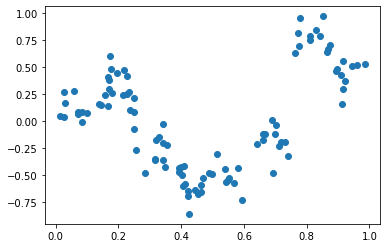

In [10]:
plt.plot(x_train,y_train,'o')

#### Q26. Complete the function train kernel ridge regression so that it performs kernel ridge regression and returns a Kernel Machine object that can be used for predicting on new points.

In [11]:
def train_kernel_ridge_regression(X, y, kernel, l2reg):
    # TODO
    N = X.shape[0]
    alpha = np.dot(np.linalg.inv(l2reg * np.identity(N) + kernel(X, X)), y)
    return Kernel_Machine(kernel, X, alpha)

#### Q27. Use the code provided to plot your fits to the training data for the RBF kernel with a fixed regularization parameter of 0.0001 for 3 different values of sigma: 0.01, 0.1, and 1.0. What values of sigma do you think would be more likely to over fit, and which less?

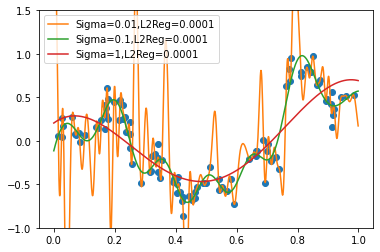

In [12]:
plot_step = .001
xpts = np.arange(0 , 1, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
l2reg = 0.0001
for sigma in [.01,.1,1]:
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
    plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.5)
plt.show()

#### Q28. Use the code provided to plot your fits to the training data for the RBF kernel with a fixed sigma of 0.02 and 4 different values of the regularization parameter λ: 0.0001, 0.01, 0.1, and 2.0. What happens to the prediction function as λ → ∞?

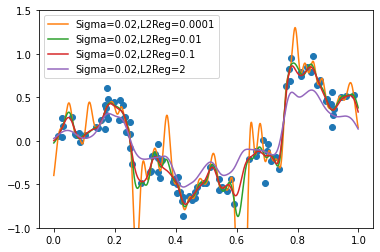

In [13]:
plot_step = .001
xpts = np.arange(0 , 1, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
sigma= .02
for l2reg in [.0001,.01,.1,2]:
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
    plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.5)
plt.show()

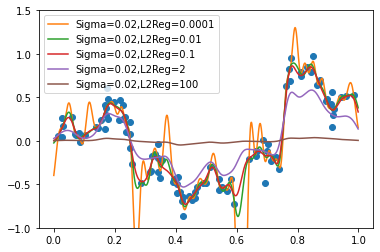

In [14]:
plot_step = .001
xpts = np.arange(0 , 1, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
sigma= .02
for l2reg in [.0001,.01,.1,2,100]:
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
    plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.5)
plt.show()

In [15]:
from sklearn.base import BaseEstimator, RegressorMixin, ClassifierMixin

class KernelRidgeRegression(BaseEstimator, RegressorMixin):  
    """sklearn wrapper for our kernel ridge regression"""
     
    def __init__(self, kernel="RBF", sigma=1, degree=2, offset=1, l2reg=1):        
        self.kernel = kernel
        self.sigma = sigma
        self.degree = degree
        self.offset = offset
        self.l2reg = l2reg 

    def fit(self, X, y=None):
        """
        This should fit classifier. All the "work" should be done here.
        """
        if (self.kernel == "linear"):
            self.k = linear_kernel
        elif (self.kernel == "RBF"):
            self.k = functools.partial(RBF_kernel, sigma=self.sigma)
        elif (self.kernel == "polynomial"):
            self.k = functools.partial(polynomial_kernel, offset=self.offset, degree=self.degree)
        else:
            raise ValueError('Unrecognized kernel type requested.')
        
        self.kernel_machine_ = train_kernel_ridge_regression(X, y, self.k, self.l2reg)

        return self

    def predict(self, X, y=None):
        try:
            getattr(self, "kernel_machine_")
        except AttributeError:
            raise RuntimeError("You must train classifer before predicting data!")

        return(self.kernel_machine_.predict(X))

    def score(self, X, y=None):
        # get the average square error
        return(((self.predict(X)-y)**2).mean()) 

In [16]:
from sklearn.model_selection import GridSearchCV,PredefinedSplit
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error,make_scorer
import pandas as pd
    
test_fold = [-1]*len(x_train) + [0]*len(x_test)   #0 corresponds to test, -1 to train
predefined_split = PredefinedSplit(test_fold=test_fold)

In [17]:
param_grid = [{'kernel': ['RBF'],'sigma':[.1,1,10], 'l2reg': np.exp2(-np.arange(-5,5,1))},
              {'kernel':['polynomial'],'offset':[-1,0,1], 'degree':[2,3,4],'l2reg':[10, .1, .01] },
              {'kernel':['linear'],'l2reg': [10,1,0.1,.01]}]
# param_grid = [{'kernel': ['RBF'],'sigma':[.1,1,10], 'l2reg': np.exp2(-np.arange(-5,5,1))},
#               {'kernel':['polynomial'],'offset':[-1,0,1], 'degree':[2,3,4],'l2reg':[10, .1, .01] },
#               {'kernel':['linear'],'l2reg': [10,1,.01]}]


kernel_ridge_regression_estimator = KernelRidgeRegression()
grid = GridSearchCV(kernel_ridge_regression_estimator, 
                    param_grid,
                    cv = predefined_split,
                    scoring = make_scorer(mean_squared_error,greater_is_better = False),
                    return_train_score=True
                   )
grid.fit(np.vstack((x_train,x_test)),np.vstack((y_train,y_test))) 

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=KernelRidgeRegression(),
             param_grid=[{'kernel': ['RBF'],
                          'l2reg': array([32.    , 16.    ,  8.    ,  4.    ,  2.    ,  1.    ,  0.5   ,
        0.25  ,  0.125 ,  0.0625]),
                          'sigma': [0.1, 1, 10]},
                         {'degree': [2, 3, 4], 'kernel': ['polynomial'],
                          'l2reg': [10, 0.1, 0.01], 'offset': [-1, 0, 1]},
                         {'kernel': ['linear'], 'l2reg': [10, 1, 0.1, 0.01]}],
             return_train_score=True,
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

#### Linear Kernel

In [22]:
param_grid = [{'kernel':['linear'],'l2reg': [10,5,4.5,4,3.5,3,1,0,.01]}]
kernel_ridge_regression_estimator = KernelRidgeRegression()
grid = GridSearchCV(kernel_ridge_regression_estimator, 
                    param_grid,
                    cv = predefined_split,
                    scoring = make_scorer(mean_squared_error,greater_is_better = False),
                    return_train_score=True
                   )
grid.fit(np.vstack((x_train,x_test)),np.vstack((y_train,y_test))) 

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=KernelRidgeRegression(),
             param_grid=[{'kernel': ['linear'],
                          'l2reg': [10, 5, 4.5, 4, 3.5, 3, 1, 0, 0.01]}],
             return_train_score=True,
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [23]:
pd.set_option('display.max_rows', 20)
df = pd.DataFrame(grid.cv_results_)
# Flip sign of score back, because GridSearchCV likes to maximize,
# so it flips the sign of the score if "greater_is_better=FALSE"
df['mean_test_score'] = -df['mean_test_score']
df['mean_train_score'] = -df['mean_train_score']
cols_to_keep = ["param_kernel","param_l2reg",
        "mean_test_score","mean_train_score"]
df_toshow = df[cols_to_keep].fillna('-')
df_toshow.sort_values(by=["mean_test_score"])

,param_kernel,param_l2reg,mean_test_score,mean_train_score
3,linear,4.00,0.164510,0.206563
4,linear,3.50,0.164510,0.206550
2,linear,4.50,0.164511,0.206577
5,linear,3.00,0.164512,0.206538
1,linear,5.00,0.164513,0.206592
6,linear,1.00,0.164540,0.206506
8,linear,0.01,0.164569,0.206501
0,linear,10.00,0.164591,0.206780
7,linear,0.00,291.525260,197.048967


#### Polynomial Kernel

In [60]:
param_grid = [{'kernel':['polynomial'],'offset':[-2,-1,0,1,2,3,4], 'degree':[2,3,4,5,6],\
               'l2reg':[.1,0.05,0.0475,0.045,0.0425,0.04,0.035,0.03,.01]}]

kernel_ridge_regression_estimator = KernelRidgeRegression()
grid = GridSearchCV(kernel_ridge_regression_estimator, 
                    param_grid,
                    cv = predefined_split,
                    scoring = make_scorer(mean_squared_error,greater_is_better = False),
                    return_train_score=True
                   )
grid.fit(np.vstack((x_train,x_test)),np.vstack((y_train,y_test))) 

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=KernelRidgeRegression(),
             param_grid=[{'degree': [2, 3, 4, 5, 6], 'kernel': ['polynomial'],
                          'l2reg': [0.1, 0.05, 0.0475, 0.045, 0.0425, 0.04,
                                    0.035, 0.03, 0.01],
                          'offset': [-2, -1, 0, 1, 2, 3, 4]}],
             return_train_score=True,
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [61]:
pd.set_option('display.max_rows', 30)
df = pd.DataFrame(grid.cv_results_)
# Flip sign of score back, because GridSearchCV likes to maximize,
# so it flips the sign of the score if "greater_is_better=FALSE"
df['mean_test_score'] = -df['mean_test_score']
df['mean_train_score'] = -df['mean_train_score']
cols_to_keep = ["param_degree", "param_kernel","param_l2reg" ,"param_offset",
        "mean_test_score","mean_train_score"]
df_toshow = df[cols_to_keep].fillna('-')
df_toshow.sort_values(by=["mean_test_score"])

,param_degree,param_kernel,param_l2reg,param_offset,mean_test_score,mean_train_score
284,6,polynomial,0.0425,2,0.032413,0.048308
277,6,polynomial,0.0450,2,0.032422,0.048770
291,6,polynomial,0.0400,2,0.032429,0.047846
270,6,polynomial,0.0475,2,0.032453,0.049231
263,6,polynomial,0.0500,2,0.032504,0.049690
...,...,...,...,...,...,...
210,5,polynomial,0.0450,-2,0.325325,0.327300
217,5,polynomial,0.0425,-2,0.388360,0.381682
224,5,polynomial,0.0400,-2,0.484716,0.463927
231,5,polynomial,0.0350,-2,0.950687,0.853393


#### RBF Kernel

In [112]:
param_grid = [{'kernel': ['RBF'],'sigma':[0.06,0.067,0.0685,0.069,0.07,0.08], 'l2reg': [0.071,0.0705,0.07,0.0695,0.069,0.06]}]
kernel_ridge_regression_estimator = KernelRidgeRegression()
grid = GridSearchCV(kernel_ridge_regression_estimator, 
                    param_grid,
                    cv = predefined_split,
                    scoring = make_scorer(mean_squared_error,greater_is_better = False),
                    return_train_score=True
                   )
grid.fit(np.vstack((x_train,x_test)),np.vstack((y_train,y_test))) 

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=KernelRidgeRegression(),
             param_grid=[{'kernel': ['RBF'],
                          'l2reg': [0.071, 0.0705, 0.07, 0.0695, 0.069, 0.06],
                          'sigma': [0.06, 0.067, 0.0685, 0.069, 0.07, 0.08]}],
             return_train_score=True,
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [113]:
pd.set_option('display.max_rows', 30)
df = pd.DataFrame(grid.cv_results_)
# Flip sign of score back, because GridSearchCV likes to maximize,
# so it flips the sign of the score if "greater_is_better=FALSE"
df['mean_test_score'] = -df['mean_test_score']
df['mean_train_score'] = -df['mean_train_score']
cols_to_keep = ["param_kernel","param_l2reg","param_sigma",
        "mean_test_score","mean_train_score"]
df_toshow = df[cols_to_keep].fillna('-')
df_toshow.sort_values(by=["mean_test_score"])

,param_kernel,param_l2reg,param_sigma,mean_test_score,mean_train_score
20,RBF,0.0695,0.0685,0.013832,0.014478
26,RBF,0.0690,0.0685,0.013832,0.014469
14,RBF,0.0700,0.0685,0.013832,0.014487
8,RBF,0.0705,0.0685,0.013832,0.014496
2,RBF,0.0710,0.0685,0.013832,0.014505
...,...,...,...,...,...
29,RBF,0.0690,0.0800,0.015417,0.017156
23,RBF,0.0695,0.0800,0.015432,0.017175
17,RBF,0.0700,0.0800,0.015447,0.017194
11,RBF,0.0705,0.0800,0.015462,0.017213


In [ ]:
pd.set_option('display.max_rows', 20)
df = pd.DataFrame(grid.cv_results_)
# Flip sign of score back, because GridSearchCV likes to maximize,
# so it flips the sign of the score if "greater_is_better=FALSE"
df['mean_test_score'] = -df['mean_test_score']
df['mean_train_score'] = -df['mean_train_score']
cols_to_keep = ["param_kernel","param_l2reg",
        "mean_test_score","mean_train_score"]
df_toshow = df[cols_to_keep].fillna('-')
df_toshow.sort_values(by=["mean_test_score"])

In [234]:
pip install qgrid

  Created wheel for qgrid: filename=qgrid-1.3.1-py2.py3-none-any.whl size=1761257 sha256=5f99c54eebdaf064f50910e5d6c66553fa2b972553579c492984cffe9a2afad6
  Stored in directory: c:\users\17346\appdata\local\pip\cache\wheels\4a\65\d3\ec3d01337551a41a66aa7fe06c4d775b4a6a8ca798244a7e84
Successfully built qgrid
Note: you may need to restart the kernel to use updated packages.


In [235]:
# Can be a more convenient way to look at the table
import qgrid 
#qgrid.nbinstall(overwrite=True)  # copies javascript dependencies to your /nbextensions folderd_toshow = df[show].fillna('-')
qgrid.show_grid(df_toshow)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

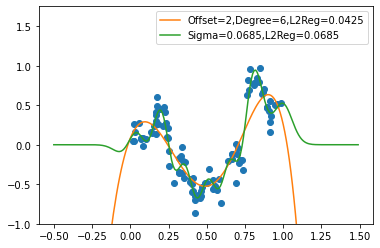

In [115]:
## Plot the best polynomial and RBF fits you found
plot_step = .01
xpts = np.arange(-.5 , 1.5, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
#Plot best polynomial fit
offset= 2
degree = 6
l2reg = 0.0425
k = functools.partial(polynomial_kernel, offset=offset, degree=degree)
f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
label = "Offset="+str(offset)+",Degree="+str(degree)+",L2Reg="+str(l2reg)
plt.plot(xpts, f.predict(xpts), label=label)
#Plot best RBF fit
sigma = 0.0685
l2reg= 0.0685
k = functools.partial(RBF_kernel, sigma=sigma)
f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.75)
plt.show()

#### Q32. Load the SVM training svm-train.txt and svm-test.txt test data from the zip file. Plot the training data using the code  supplied. Are the data linearly separable? Quadratically separable? What if we used some RBF kernel?

# Kernel SVM optional problem

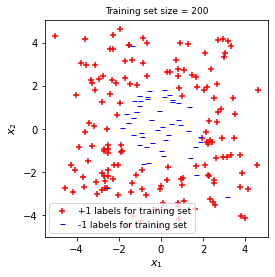

In [219]:
# Load and plot the SVM data
#load the training and test sets
data_train,data_test = np.loadtxt("svm-train.txt"),np.loadtxt("svm-test.txt")
x_train, y_train = data_train[:,0:2], data_train[:,2].reshape(-1,1)
x_test, y_test = data_test[:,0:2], data_test[:,2].reshape(-1,1)

#determine predictions for the training set
yplus = np.ma.masked_where(y_train[:,0]<=0, y_train[:,0])
xplus = x_train[~np.array(yplus.mask)]
yminus = np.ma.masked_where(y_train[:,0]>0, y_train[:,0])
xminus = x_train[~np.array(yminus.mask)]

#plot the predictions for the training set
figsize = plt.figaspect(1)
f, (ax) = plt.subplots(1, 1, figsize=figsize) 

pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='r', label = '+1 labels for training set')
minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', label = '-1 labels for training set')

ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('Training set size = %s'% len(data_train), fontsize=9)  
ax.axis('tight')
ax.legend(handles=[pluses, minuses], fontsize=9)
plt.show()

In [232]:
## Plot the best polynomial and RBF fits you found
#plt.plot(x_train,y_train,'o')

plot_step = .05
sigma = 1
xpts = np.arange(-5.0, 5, plot_step).reshape(-1,1)
print(xpts.shape)

#Plot best polynomial fit
offset= 1
degree = 2
l2reg = 1
k = functools.partial(polynomial_kernel, offset=offset, degree=degree)
f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
label = "Offset="+str(offset)+",Degree="+str(degree)+",L2Reg="+str(l2reg)
plt.plot(xpts, f.predict(xpts), label=label)

# for i in range(len(x_train)):
#     k = functools.partial(polynomial_kernel, offset=offset, degree=degree)
#     f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
#     label = "Offset="+str(offset)+",Degree="+str(degree)+",L2Reg="+str(l2reg)
#     plt.plot(x_train, f.predict(x_train), 'o')
#     pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='r', label = '+1 labels for training set')
#     minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', label = '-1 labels for training set')
#   #  plt.legend(loc = 'best')    
# plt.show() 

(200, 1)


ValueError: shapes (200,2) and (1,200) not aligned: 2 (dim 1) != 1 (dim 0)

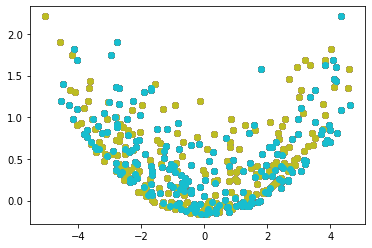

In [217]:
plot_step = .001
offset = 1
degree = 2

# plt.plot(x_train,y_train,'o')
# l2reg = 0.0001
# for sigma in [.01,.1,1]:
#     k = functools.partial(polynomial_kernel, offset=1, degree=2)
#     f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
#     label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
#     plt.plot(xpts, f.predict(xpts), label=label)
# plt.legend(loc = 'best')
# plt.ylim(-1,1.5)
# plt.show()

plot_step = .01
sigma = 1
xpts = np.arange(-5.0, 5, plot_step).reshape(-1,1)
weights = np.ones(200)

for i in range(len(x_train)):
 #   k = functools.partial(RBF_kernel, sigma=sigma)
    k = functools.partial(polynomial_kernel, offset=offset, degree=degree)
  #  f = Kernel_Machine(k, x_train, weights)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    plt.plot(x_train, f.predict(x_train), 'o')
    pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='r', label = '+1 labels for training set')
    minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', label = '-1 labels for training set')
  #  plt.legend(loc = 'best')    
plt.show() 

In [ ]:
# Code to help plot the decision regions
# (Note: This ode isn't necessarily entirely appropriate for the questions asked. So think about what you are doing.)
 
sigma=1
k = functools.partial(RBF_kernel, sigma=sigma)
f = train_soft_svm(x_train, y_train, k, ...)

#determine the decision regions for the predictions
x1_min = min(x_test[:,0])
x1_max= max(x_test[:,0])
x2_min = min(x_test[:,1])
x2_max= max(x_test[:,1])
h=0.1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

Z = f.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#determine the predictions for the test set
y_bar = f.predict (x_test) 
yplus = np.ma.masked_where(y_bar<=0, y_bar)
xplus = x_test[~np.array(yplus.mask)]
yminus = np.ma.masked_where(y_bar>0, y_bar)
xminus = x_test[~np.array(yminus.mask)]

#plot the learned boundary and the predictions for the test set
figsize = plt.figaspect(1)
f, (ax) = plt.subplots(1, 1, figsize=figsize) 
decision =ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='b', label = '+1 prediction for test set')
minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', label = '-1 prediction for test set')
ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('SVM with RBF Kernel: training set size = %s'% len(data_train), fontsize=9)  
ax.axis('tight')
ax.legend(handles=[pluses, minuses], fontsize=9)
plt.show()